In [1]:
import keras
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import model_from_json

/home/sagar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Model
json_file  =  open('iop_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Weights
loaded_model.load_weights("iop_model.h5")
print("loaded model")

categories = {}
categories[0] = "T-shirt/top"
categories[1] = "Trouser"
categories[2] = "Pullover"
categories[3] = "Dress"
categories[4] = "Coat"
categories[5] = "Sandal"
categories[6] = "Shirt"
categories[7] = "Sneaker"
categories[8] = "Bag"
categories[9] = "Ankle boot"

loaded model


In [4]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [5]:
loaded_model.pop()

In [6]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [7]:
path = '/home/sagar/Downloads/iop_test1.jpg'

import cv2
img = cv2.imread(path,0)
img = np.array(img)
img = cv2.resize(img, (28,28)) 
img.astype('float32')
img = img/255.

In [34]:
pre = loaded_model.predict(test_X[20][None,:,:,:])

In [35]:
pre
pre.shape

(1, 128)

In [36]:
from keras.datasets import fashion_mnist

In [37]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [38]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [39]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [40]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

('Original label:', 9)
('After conversion to one-hot:', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))


In [41]:
feature_vectors = loaded_model.predict(train_X)

In [42]:
feature_vectors.shape

(60000, 128)

(0.9602135, 8179)


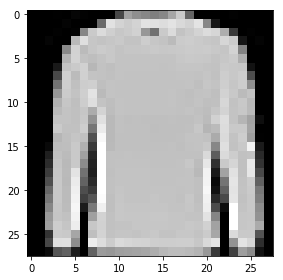

In [43]:
#Cosine Distance Norm

best_idx = 0
best_norm = 0
for i in range(0,len(feature_vectors)-1):
    norm_here = (np.dot(feature_vectors[i,:],pre[0,:]))/(np.linalg.norm(feature_vectors[i,:]*np.linalg.norm(pre[0,:])))
    if norm_here > best_norm:
        best_norm = norm_here
        best_idx = i
print(best_norm,best_idx)

plt.imshow(train_X[best_idx].reshape(28,28), cmap='gray', interpolation='none')
plt.tight_layout()
    

In [48]:
print(categories[train_Y[best_idx]],best_idx,train_Y[best_idx])

('Pullover', 8179, 2)


In [46]:
print(categories[test_Y[20]])

Pullover
